In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
#case = "manyR"
#case = "R0manyD"
case = "R1manyD"

cosine = True

#Rs = [0, 1, 3, 10, 30, 100, 300, 1_000, 3_000]
SERVER_ROUNDS = 20
suffix_str = ""
if cosine:
    # Kappas for cosine similarity
    # kappas = np.round(np.concatenate((np.arange(0,0.3, 0.02), np.arange(0.3, 1, 0.1))),3)   
    cosine_str = '_cosine'
else:
    # Kappas for Euclidean distance
    # kappas = np.round(np.concatenate((np.arange(0, 1, 0.2), np.arange(1,10,1), np.arange(10,55,5))),3)
    cosine_str = ''

result_dir = "/home/salesort/Documents/644_CMPUT/res_analysis"

if case == "manyR":
    title = "Multiple mislabeled samples, balanced data"
    var_label = var = "R"
elif case == "R0manyD":
    title = "No mislabeled samples, unbalanced data"
    var = "D"
elif case == "R1manyD":
    title = "One mislabeled sample, unbalanced data"
    var = "D"
    var_label = "Dominant Proportion"
    
if cosine:
    title += " (Cosine dissimilarity)"
else:
    title += " (Euclidean distance)"

df_handle = f"df_{case}{cosine_str}{suffix_str}.csv"
print(df_handle)

df_R1manyD_cosine.csv


In [3]:
#Rs = [0, 1, 3, 10, 30, 100, 300, 1_000, 3_000]
df_classifier = pd.read_csv(f'/home/salesort/Documents/644_CMPUT/res_analysis/{df_handle}')
#df_classifier = pd.read_csv(f'/home/salesort/Documents/644_CMPUT/res_analysis/df_classifier_R.csv')

In [4]:
#df_classifier.head(200)

In [5]:
kappas = df_classifier["kappa"].unique()
Rs = df_classifier["R"].unique()
Ds = df_classifier["D"].unique()

In [6]:
#df_classifier["Recall"] = df_classifier["TP"]/(df_classifier["TP"] + df_classifier["FN"]) # TP/(TP+FN)
#df_classifier["Precision"] = df_classifier["TP"]/(df_classifier["TP"] + df_classifier["FP"]) # TP/(TP+FP)
#df_classifier["TPR"] = df_classifier["TP"]/(df_classifier["TP"] + df_classifier["FN"]) # TP/(TP+FN)
#df_classifier["FPR"] = df_classifier["FP"]/(df_classifier["FP"] + df_classifier["TN"]) # FP/(FP+TN)
## Accuracy = (TP+TN)/(TP+TN+FP+FN)
#df_classifier["F1"] = 2*df_classifier["TP"]/(2*df_classifier["TP"]+df_classifier["FP"]+df_classifier["FN"])# F1 = 2*TP / (2*TP+FP+FN)

In [7]:
df_classifier.describe()

,R,D,kappa,accu,TN,FN,TP,FP,Recall,Precision,TPR,FPR,F1
count,110.0,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,67.000000,110.000000,110.000000,110.000000
mean,1.0,0.648000,0.286364,0.884227,168.427273,11.581818,8.418182,11.572727,0.420909,0.846597,0.420909,0.064293,0.389486
std,0.0,0.321803,0.253590,0.187012,39.885722,8.566397,8.566397,39.885722,0.428320,0.298900,0.428320,0.221587,0.398568
min,1.0,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
25%,1.0,0.500000,0.100000,0.900000,180.000000,1.250000,0.000000,0.000000,0.000000,0.909091,0.000000,0.000000,0.000000
50%,1.0,0.750000,0.210000,0.905000,180.000000,14.500000,5.500000,0.000000,0.275000,1.000000,0.275000,0.000000,0.181818
75%,1.0,0.900000,0.400000,0.960000,180.000000,20.000000,18.750000,0.000000,0.937500,1.000000,0.937500,0.000000,0.775735
max,1.0,0.990000,0.900000,1.000000,180.000000,20.000000,20.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000


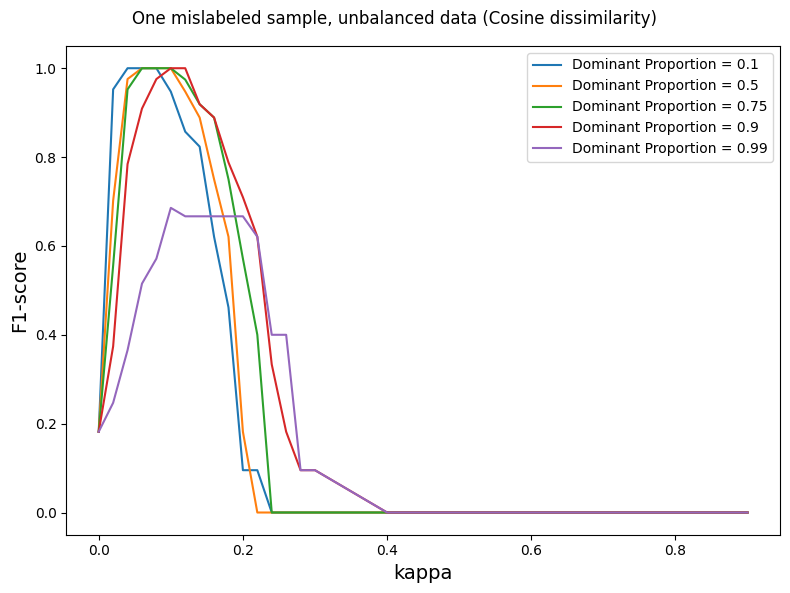

In [8]:
fig1 = plt.figure(figsize=(8,6)) 
ax1 = fig1.add_subplot(1,1,1)
#ax2 = fig1.add_subplot(2,1,2)

if var == "R":
    var_vals = [3, 300, 3000]
else:
    var_vals = [0.1, 0.5, 0.75, 0.9, 0.99]
    

for var_val in var_vals:
    f1_r = df_classifier[df_classifier[var] == var_val]["F1"]
    accu = df_classifier[df_classifier[var] == var_val]["accu"]
    ax1.plot(kappas, f1_r, label = f"{var_label} = {var_val}")
    #ax2.plot(kappas, accu, label = f"R = {R}")
ax1.set_xlabel("kappa", fontsize=14)
#ax2.set_xlabel("kappa", fontsize=14)
ax1.set_ylabel("F1-score", fontsize=14)
#ax2.set_ylabel("Accuracy", fontsize=14)
ax1.legend(loc="upper right")
#ax2.legend(loc="upper right")
fig1.suptitle(title)
fig1.tight_layout()
    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


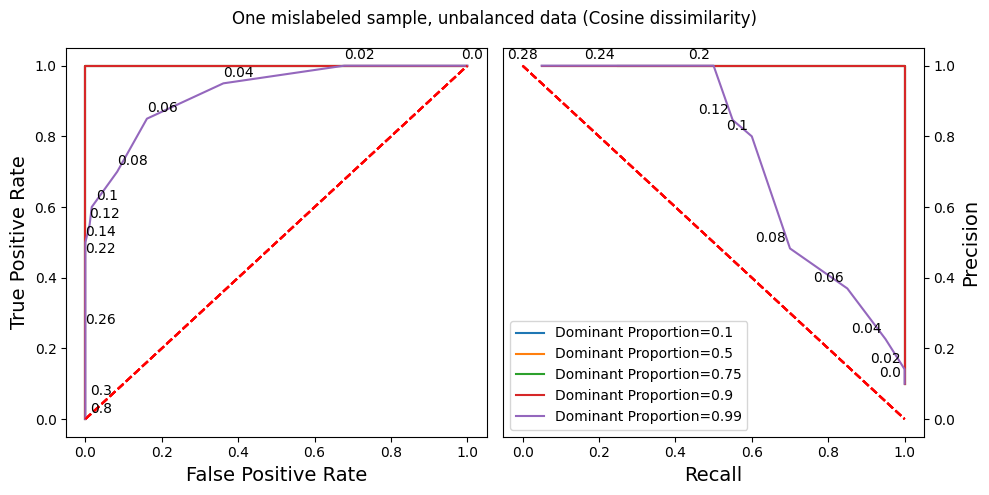

In [9]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

for var_val in var_vals: #Rs
    TPR = df_classifier[df_classifier[var] == var_val]["TPR"]
    FPR = df_classifier[df_classifier[var] == var_val]["FPR"]
    Precision = df_classifier[df_classifier[var] == var_val]["Precision"]
    Recall = df_classifier[df_classifier[var] == var_val]["Recall"]
    ax1.plot(FPR, TPR, label = f"{var_label}={var_val}")
    ax1.plot([0,1],[0,1], color = 'r', ls= '--')
    ax2.plot([0,1],[1,0], color = 'r', ls= '--')
    ax2.plot(Recall, Precision, label = f"{var_label}={var_val}")
    ax1.set_xlim([-0.05, 1.05])
    ax1.set_ylim([-0.05, 1.05])
    ax2.set_xlim([-0.05, 1.05])
    ax2.set_ylim([-0.05, 1.05])
    ax1.set_xlabel("False Positive Rate", fontsize=14)
    ax1.set_ylabel("True Positive Rate", fontsize=14)
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.set_xlabel("Recall", fontsize=14)
    ax2.set_ylabel("Precision", fontsize=14)
for i, (i_TPR, i_FPR, i_Precision, i_Recall) in enumerate(zip(TPR, FPR, Precision, Recall)):
    #if i in [0]: # Case 1/6
    #if i in [0]: # Case 2/6
    #if i in [0]: # Case 5/6
    if i in [0]: # Case 6/6
        ax1.text(i_FPR+0.04, i_TPR+0.01, kappas[i], horizontalalignment='right', verticalalignment='bottom')
    #if i in [ 1, 2, 3, 5, 6, 8, 15, 16]: # Case 1/6
    #if i in [ 3, 5, 6, 8, 10, 11, 12, 13, 15, 16, 18, 20]: # Case 5/6
    if i in [1,2,3,4,5,6,7,11, 13, 15, 20]: # Case 6/6
        ax1.text(i_FPR+0.04, i_TPR+0.01, kappas[i], horizontalalignment='center', verticalalignment='bottom')
    #if i in [14]: # Case 1/6
    #if i in [3]: # Case 2/6
    #if i in []: # Case 5/6
    if i in []: # Case 6/6
        ax1.text(i_FPR+0.04, i_TPR-0.04, kappas[i], horizontalalignment='center', verticalalignment='bottom', fontsize=8)
    #if i in [0, 2, 3, 4, 5, 6, 7, 14, 15,]:
    #if i in [0,1, 2, 3, 4, 5, 6, 7, 14, 16,]: # Case 2/6
    #if i in [0, 5, 6, 7, 8,9,10, 11, 12, 14,  15, 17, 18]: # Case 5/6
    if i in [0, 1,2,3,4,5, 6, 10, 12, 14,    18]: # Case 6/6
        ax2.text(i_Recall-0.01, i_Precision+0.01, kappas[i], horizontalalignment='right', verticalalignment='bottom')
ax2.legend(loc=("lower left"))
fig1.suptitle(title)
fig1.tight_layout()

In [10]:
df_classifier[df_classifier["R"] == 300].head(200).reset_index(drop=True)

,R,D,kappa,accu,TN,FN,TP,FP,Recall,Precision,TPR,FPR,F1


In [11]:
from multiprocessing import Pool

In [12]:
def fn(a,  c=False, b=2):
    if c:
        return a + b
    else:
        return a*b

In [13]:
a = [1,2,3]
b = [3,3,3]
c = [False, False, False]
with Pool(5) as p:
    res = p.starmap(fn, zip(a,b,c))
print(res)

[1, 2, 3]


In [14]:
[]

[]

In [15]:
list(np.array([[i]*2 for i in range(5)]).flatten())

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4]